# K-Nearest Neighbor

Berikut ini adalah langkah-langkah dalam menyelesaikan permasalahan klasifikasi menggunakan KNN :

### 1. Membaca Data Train

Membaca data yang akan *ditrain* untuk mendapatkan `K` terbaik, akurasi, dan yang akan digunakan untuk memprediksi *data test* nantinya.

In [1]:
import pandas as pd

data_train_from_csv = pd.read_csv('dataTrain.csv')
data_train_from_csv.head()

,atribut 1,atribut 2,atribut 3,atribut 4,kelas
0,17.4,61.250,10.4,21.0,1
1,16.2,34.375,14.8,15.6,1
2,11.4,46.875,10.8,9.9,0
3,12.6,76.250,18.0,25.5,1
4,16.2,55.000,9.8,15.9,0


### 2. Menghitung Euclidean Distance

Dalam melakukan perhitungan jarak pada KNN dapat digunakan bebrapa teori, diantanya adalah *euclidean* dan *manhattan*. Dalam percobaan kali ini akan dilakukan dengan menggunakan teori *euclidean* dalam menghitung jaraknya.

*Euclidean distance* melakukan perhitungan jarak antara dua buah titik dalam *euclidean space*. Berikut adalah formulanya :

<img src="assets/euclidean.png">

In [2]:
import numpy as np

def euclideanDistance(data_train, data_test):
    distanceSum = 0
    for i in range(len(data_train)-1):
        distanceSum += (data_train[i]-data_test[i])**2
    return np.sqrt(distanceSum)

### 3. KNN Algorithm

KNN merupakan algoritma yang digunakan dalam melakukan memecahkan permasalahan klasifikasi, sehingga menghasilkan output diskrit. Contoh untuk output berupa diskrit adalah output yang hasilnya pasti seperti ketika menghitung 1 + 1 = 2, jawabannya bukan mendekati 2. KNN akan melakukan klasifikasi terhadap objek berdasarkan data pembelajaran yang jaraknya paling dekat dengan objek tersebut.

KNN akan bekerja berdasarkan jarak minimum dari data baru ke data training untuk menentukan tetangga terdekat. Setelah itu akan didapatkan data mayoritas sebagai hasil prediksi dari data baru tadi.

In [3]:
import operator

def kNearestNeighbor(data_train, data_test, k):
    distances = {}
    sort = {}
    neighbors = []
    vote_class = {}
  
    for i in range(len(data_train)):
        distance = euclideanDistance(data_train.iloc[i], data_test)
        distances[i] = distance
  
    sorted_distances = sorted(distances.items(), key=operator.itemgetter(1))
  
    for i in range(k):
        neighbors.append(sorted_distances[i][0])
    
    for x in range(len(neighbors)):
        class_in_datatrain = data_train.iloc[neighbors[x]][-1]
    
        if class_in_datatrain in vote_class:
            vote_class[class_in_datatrain] += 1
        else:
            vote_class[class_in_datatrain] = 1
  
    sorted_vote_class = sorted(vote_class.items(), key=operator.itemgetter(1))
  
    return sorted_vote_class[-1][0]

### 4. Menghitung Akurasi

Akurasi akan didapatkan dari perbandingan hasil prediksi dengan data sebenarnya.

In [4]:
def predictionAccuracy(prediction_data, data_test):
    accurate = 0
  
    for i in range(len(prediction_data)):
        if prediction_data[i] == data_test.iloc[i][-1]:
            accurate += 1
      
    return (accurate/len(prediction_data)) * 100

### 5. Cross Validation & Tuning Parameter

**Cross Validation**

*Cross validation* merupakn metode statistik dalam melakukan evaluasi kinerja dari suatu model atau algoritma dengan melakukan pembagian data menjadi dua subset, yaitu `data pengujian` dan `data pelatihan`.

> **K-Fold Cross Validation**
K-Fold Cross Validation merupakan salah satu metode Cross validation yang bekerja dengan melipat data sebanyak K dan melakukan perulangan sebanyak `K` juga. Contohnya untuk `K` = 10:

<img src="assets/k-fold.png">

**Tuning Parameter**

Untuk mendapatkan akurasi yang terbaik saat melakukan klasifikasi di KNN, akan sangat bergantung pada nilai `K` yang kita berikan. Proses dalam mencari `K` terbaik dapat disebut sebagain *Tuning Parameter8* atau *Hyperparameter*.

In [5]:
import matplotlib.pyplot as plt

def crossValFtTunParam(data_train_from_csv):
    dev_by5 = int(len(data_train_from_csv)/5)
    fold1 = data_train_from_csv.iloc[0:dev_by5]
    fold2 = data_train_from_csv.iloc[dev_by5:dev_by5*2]
    fold3 = data_train_from_csv.iloc[dev_by5*2:dev_by5*3]
    fold4 = data_train_from_csv.iloc[dev_by5*3:dev_by5*4]
    fold5 = data_train_from_csv.iloc[dev_by5*4:]
    
    if(len(data_train_from_csv)/5) > 100:
        k_range = range(1, 101)
    else:
        k_range = range(1, dev_by5+1)
        
    best_k = {}
    
    for k in k_range:
        accuracy_crossval = []
        for i in range(1,6):
            prediction_data = []
            if i == 1:
                data_test = fold1
                data_train = pd.concat([fold2, fold3, fold4, fold5])
            elif i == 2:
                data_test = fold2
                data_train = pd.concat([fold1, fold3, fold4, fold5])
            elif i == 3:
                data_test = fold3
                data_train = pd.concat([fold1, fold2, fold4, fold5])
            elif i == 4:
                data_test = fold4
                data_train = pd.concat([fold1, fold2, fold3, fold5])
            else:
                data_test = fold5
                data_train = pd.concat([fold1, fold2, fold3, fold4])

            for x in range(len(data_test)):
                prediction_data.append(kNearestNeighbor(data_train, data_test.iloc[x], k))
            
            tmp_accuracy = predictionAccuracy(prediction_data, data_test)
            accuracy_crossval.append(tmp_accuracy)
        
        best_k[k] = sum(accuracy_crossval)/len(accuracy_crossval)
        
    plt.scatter(k_range, best_k.values())
    plt.title('Plot Hasil Pencarian K Terbaik')
    plt.xlabel('Nomor K')
    plt.ylabel('Akurasi K')
    plt.show()
    
    K = max(best_k.items(), key=operator.itemgetter(1))[0]
    
    print(best_k)
        
    return K, best_k[K]

### Mendapatkan K terbaik dan Akurasinya

Memanggil fungsi yang telah dibuat sebelumnya untuk mendapatkan K terbaik beserta menampilakan besar akurasi yang dihasilkan.

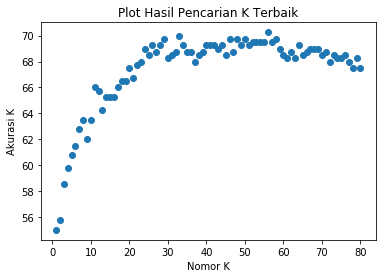

{1: 55.0, 2: 55.75, 3: 58.5, 4: 59.75, 5: 60.75, 6: 61.5, 7: 62.75, 8: 63.5, 9: 62.0, 10: 63.5, 11: 66.0, 12: 65.75, 13: 64.25, 14: 65.25, 15: 65.25, 16: 65.25, 17: 66.0, 18: 66.5, 19: 66.5, 20: 67.5, 21: 66.75, 22: 67.75, 23: 68.0, 24: 69.0, 25: 68.5, 26: 69.25, 27: 68.75, 28: 69.25, 29: 69.75, 30: 68.25, 31: 68.5, 32: 68.75, 33: 70.0, 34: 69.25, 35: 68.75, 36: 68.75, 37: 68.0, 38: 68.5, 39: 68.75, 40: 69.25, 41: 69.25, 42: 69.25, 43: 69.0, 44: 69.25, 45: 68.5, 46: 69.75, 47: 68.75, 48: 69.75, 49: 69.25, 50: 69.75, 51: 69.25, 52: 69.5, 53: 69.5, 54: 69.5, 55: 69.5, 56: 70.25, 57: 69.5, 58: 69.75, 59: 69.0, 60: 68.5, 61: 68.25, 62: 68.75, 63: 68.25, 64: 69.25, 65: 68.5, 66: 68.75, 67: 69.0, 68: 69.0, 69: 69.0, 70: 68.5, 71: 68.75, 72: 68.0, 73: 68.5, 74: 68.25, 75: 68.25, 76: 68.5, 77: 68.0, 78: 67.5, 79: 68.25, 80: 67.5}
|| Best k     :  56
|| Accuracy   :  70.25 %


In [6]:
best_k, accuracy = crossValFtTunParam(data_train_from_csv)
print('===============================')
print('|| Best k     : ', best_k)
print('|| Accuracy   : ', accuracy, '%')
print('===============================')

### Calculate Data Test CSV

Setelah mengolah data train untuk mendapatkan K terbaik beserta akurasinya, sekarang adalah waktunya untuk mengolah data test untuk mendapatkan kelasnya.

**1. Membaca Data Test**

In [7]:
data_test_from_csv = pd.read_csv('dataTest.csv')
data_test_from_csv.head()

,atribut 1,atribut 2,atribut 3,atribut 4,kelas
0,8.4,54.375,13.6,13.5,NaN
1,10.8,67.500,14.4,22.2,NaN
2,21.6,62.500,13.6,20.7,NaN
3,10.8,46.875,9.0,16.8,NaN
4,10.8,58.750,14.2,13.5,NaN


**2. Mendapatkan Prediksi Kelas**

In [8]:
prediction_data = []

for x in range(len(data_test_from_csv)):
    prediction_data.append(int(kNearestNeighbor(data_train_from_csv, data_test_from_csv.iloc[x], best_k)))

**3. Menyimpan Data Hasil Prediksi**

In [9]:
data_test_from_csv['kelas'] = prediction_data
data_test_from_csv.to_csv('dataHasilPrediksi.csv')

### Hasil Prediksi

In [10]:
data_hasil_from_csv = pd.read_csv('dataHasilPrediksi.csv')
data_hasil_from_csv.drop(columns=['Unnamed: 0'])

,atribut 1,atribut 2,atribut 3,atribut 4,kelas
0,8.4,54.375,13.6,13.5,0
1,10.8,67.500,14.4,22.2,1
2,21.6,62.500,13.6,20.7,1
3,10.8,46.875,9.0,16.8,0
4,10.8,58.750,14.2,13.5,0
5,21.6,61.875,11.2,18.3,1
6,6.0,54.375,14.2,18.3,0
7,7.8,45.000,10.2,21.6,0
8,21.0,42.500,14.6,18.3,0
9,6.0,58.750,12.8,21.3,0
